## <span style="color:blue">PART 4: LINEAR REGRESSION MODELLING</span>
### <span style="color:blue">4.1 BUILDING A BASELINE MODEL</span>

#### <span style="color:blue">4.1.1 Examining the correlation of all other columns with price</span>

In [41]:
# Correlation coefficients for the various numeric variables
housing_data.corr()['price'].nlargest(9)[1:]

sqft_living      0.704441
grade            0.667733
sqft_above       0.609638
sqft_living15    0.582478
bathrooms        0.526620
view             0.388022
sqft_basement    0.318834
bedrooms         0.317152
Name: price, dtype: float64

#### <span style="color:blue">4.1.2 Pearson Correlation Matrix</span>

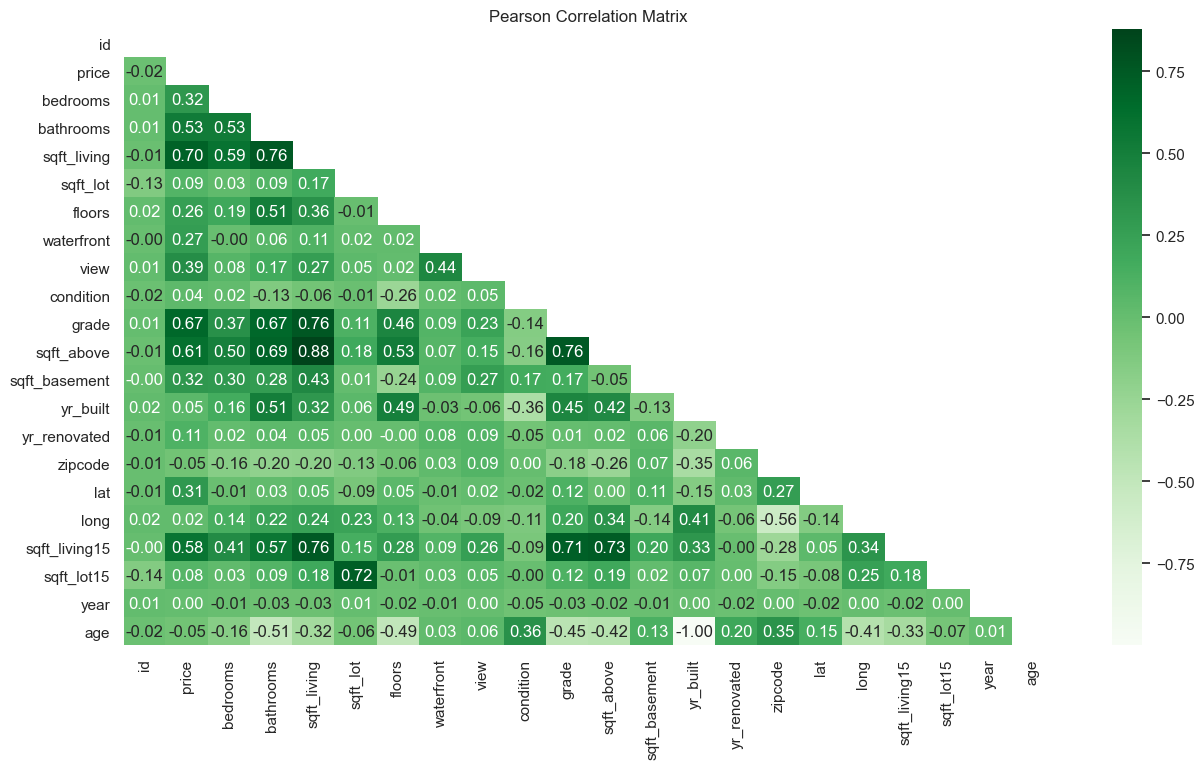

In [42]:
# Calculate the Pearson correlation matrix
correlation_matrix = housing_data.corr()

# Create a heatmap plot
plt.figure(figsize=(15, 8))

# Create a mask to hide self-correlations and a green-based colormap
sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.color_palette("Greens", as_cmap=True), 
    annot=True, fmt=".2f"
    )
plt.title('Pearson Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [43]:
# Pick the independent variable with the highest correlation with price
most_correlated = housing_data.corr()['price'].nlargest().index[1]
most_correlated

'sqft_living'

The correlation coefficients show that the size of the living area in square feet ('sqft_living' column) has the highest correlation with price. 

Therefore, we will use it as in our baseline model.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


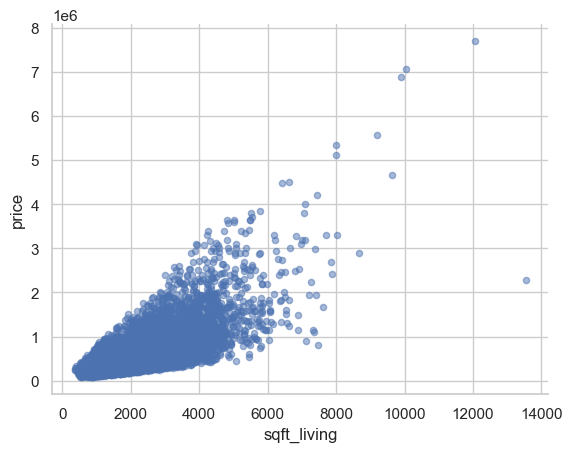

In [44]:
# Plot a scatter plot of living area size vs. price
housing_data.plot.scatter(x=most_correlated, y="price", alpha=0.5);

In [45]:
# Declare y and X_baseline variables, where y is a Series containing price data 
# and X_baseline is a Series containing the column with the strongest correlation
y = housing_data['price']

X_baseline = housing_data['sqft_living']

In [46]:
# Creating and fitting a simple linear regression
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

# Summary results
print("Summary results\n", baseline_results.summary())

Summary results
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:48:25   Log-Likelihood:            -2.6636e+05
No. Observations:               19163   AIC:                         5.327e+05
Df Residuals:                   19161   BIC:                         5.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.863e+04   4697.231

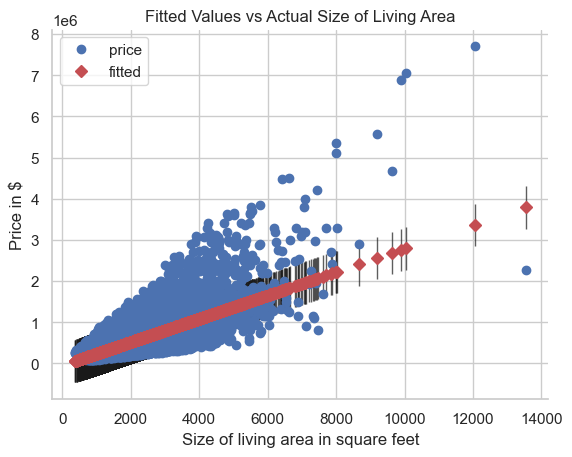

In [47]:
# Visualize the actual vs. predicted values and the confidence interval
sm.graphics.plot_fit(baseline_results, 'sqft_living')
plt.title('Fitted Values vs Actual Size of Living Area')
plt.xlabel('Size of living area in square feet')
plt.ylabel('Price in $')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


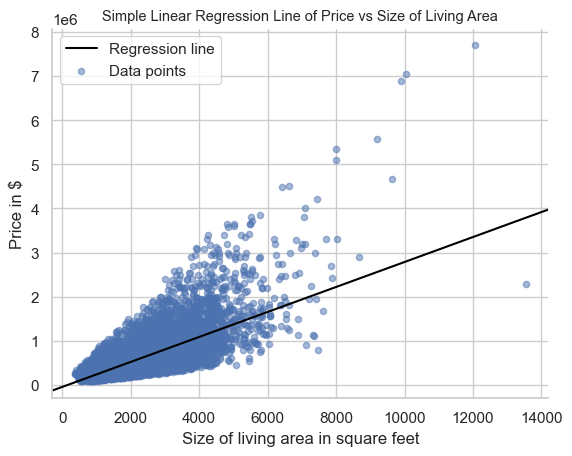

In [48]:
# Visualize the Simple Linear Regression Line
fig, ax = plt.subplots()
housing_data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax, alpha=0.5)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
plt.title('Simple Linear Regression Line of Price vs Size of Living Area', fontsize=10.5)
plt.xlabel('Size of living area in square feet')
plt.ylabel('Price in $')
ax.legend();

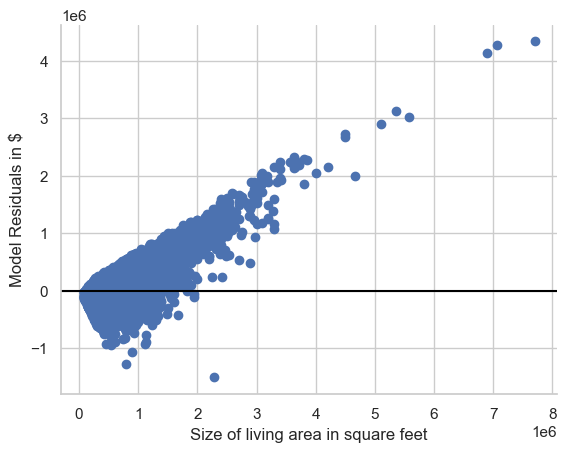

In [49]:
# Visualize the distribution of model residuals 
fig, ax = plt.subplots()

ax.scatter(housing_data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("Size of living area in square feet")
ax.set_ylabel("Model Residuals in $");

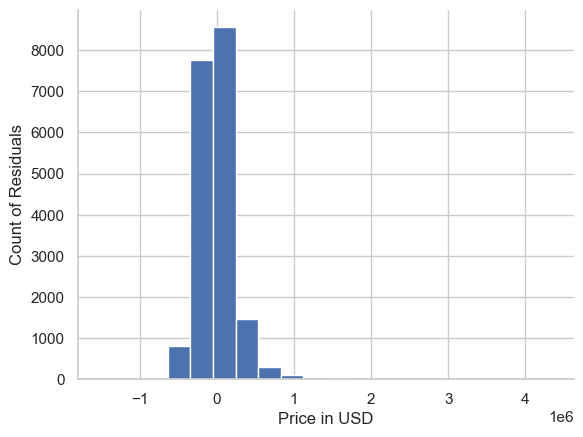

In [50]:
# Visualize the distribution of model residuals 
plt.hist(baseline_results.resid, bins=20)
plt.xlabel("Price in USD")
plt.ylabel("Count of Residuals");

A scatter plot of the model residuals shows that the difference between the true value of a house and the predicted value increases with the rise in the price of a house.

However, the histogram of the residuals shows that most of the residuals are concentrated between -\\$500,000 and \\$500,000. 
The outlying residuals above and below this range are minimal.

#### <span style="color:blue">Evaluation and Interpretation of Baseline Model Results</span>

The overall p-value of the model is about 0.00. Working with a significance level of alpha=0.05, we can
see that p-value is much less than alpha, meaning that the baseline model is highly statistically significant.

The coefficient of determination is 0.496 which indicates that size of living area is explaining 49.6% of the variance in price.

Living area has a coefficient of \\$283.4081, which means that for every unit increase in living area, the price increases by
\\$283.40.

The y-intercept is about -\\$48,630. This means that when living area is 0 square feet, then the sale price of a house is about -\\$48,630.

### <span style="color:blue">4.2 MULTIPLE LINEAR REGRESSION MODELLING USING FORWARD SELECTION</span>
In the [forward selection technique of multiple linear regression modelling](https://www.simplilearn.com/what-is-backward-elimination-technique-in-machine-learning-article), the most relevant features are added to the model one at a time until the model performance reaches a peak.

#### <span style="color:blue">4.2.1 1ST MULTIPLE LINEAR REGRESSION MODEL</span>

In [51]:
# 1st Multiple linear regression model that includes grade
y = housing_data['price']

first_model = housing_data[['sqft_living', 'grade']]

In [52]:
# Creating and fitting a multiple linear regression
first_multiple_model = sm.OLS(y, sm.add_constant(first_model))
first_results = first_multiple_model.fit()

# Summary results
print("Summary results\n", first_results.summary())

Summary results
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:48:28   Log-Likelihood:            -2.6556e+05
No. Observations:               19163   AIC:                         5.311e+05
Df Residuals:                   19160   BIC:                         5.312e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -6.02e+05   1.43e+04

##### <span style="color:blue">Evaluation and Interpretation of First Multiple Linear Regression Model Results</span>

The overall p-value of this model is about 0.00. Working with a significance level of alpha=0.05, we can
see that p-value is much less than alpha, meaning that the first multiple linear regression model is highly statistically significant.

The coefficient of determination is 0.537 which indicates that size of living area and grade are explaining 53.7% of the variance in price.

Living area has a coefficient of \\$187.7516, which means that for every unit increase in living area, the price increases by \\$187.75.
   
Grade has a coefficient of \\$98,230, which means that for every unit increase in grade, the price increases by \\$98,230.

The y-intercept is about -\\$602,000. This means that when living area is 0 square feet and the grade is 0, then the sale price of a house is about -\\$602,000.

#### <span style="color:blue">4.2.2 2ND MULTIPLE LINEAR REGRESSION MODEL</span>

In [53]:
# 2nd Multiple linear regression model that includes grade and sqft_above
y = housing_data['price']

second_model = housing_data[['sqft_living', 'grade', 'sqft_above']]

In [54]:
# Creating and fitting a multiple linear regression
second_multiple_model = sm.OLS(y, sm.add_constant(second_model))
second_results = second_multiple_model.fit()

# Summary results
print("Summary results\n", second_results.summary())

Summary results
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     7578.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:48:28   Log-Likelihood:            -2.6544e+05
No. Observations:               19163   AIC:                         5.309e+05
Df Residuals:                   19159   BIC:                         5.309e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -6.54e+05   1.45e+04

#### <span style="color:blue">4.2.3 3RD MULTIPLE LINEAR REGRESSION MODEL</span>

In [55]:
# 3rd Multiple linear regression model that includes grade, sqft_above, 
# and sqft_living15
y = housing_data['price']

third_model = housing_data[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']]

In [56]:
# Creating and fitting a multiple linear regression
third_multiple_model = sm.OLS(y, sm.add_constant(third_model))
third_results = third_multiple_model.fit()

# Summary results
print("Summary results\n", third_results.summary())

Summary results
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5697.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:48:29   Log-Likelihood:            -2.6542e+05
No. Observations:               19163   AIC:                         5.309e+05
Df Residuals:                   19158   BIC:                         5.309e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.509e+05   1.

#### <span style="color:blue">4.2.4 4TH MULTIPLE LINEAR REGRESSION MODEL</span>

In [57]:
# 4th Multiple linear regression model that includes grade, sqft_above, 
# and sqft_living15
y = housing_data['price']

fourth_model = housing_data[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]

In [58]:
# Creating and fitting a multiple linear regression
fourth_multiple_model = sm.OLS(y, sm.add_constant(fourth_model))
fourth_results = fourth_multiple_model.fit()

# Summary results
print("Summary results\n", fourth_results.summary())

Summary results
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     4602.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:48:29   Log-Likelihood:            -2.6537e+05
No. Observations:               19163   AIC:                         5.308e+05
Df Residuals:                   19157   BIC:                         5.308e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.502e+05   1.

##### <span style="color:blue">Evaluation and Interpretation of Fourth Multiple Linear Regression Model Results</span>

The overall p-value of this model is about 0.00. Working with a significance level of alpha=0.05, we can
see that p-value is much less than alpha, meaning that the fourth multiple linear regression model is highly statistically significant.

The coefficient of determination is 0.546 which indicates that size of living area and grade are explaining 54.6% of the variance in price.

Living area has a coefficient of \\$249.6979, which means that for every unit increase in the square footage of the apartment's interior living space, the price increases by \\$249.70.
   
Grade has a coefficient of \\$111,500, which means that for every unit increase in grade, the price increases by \\$111,500.

sqft_above has a coefficient of -\\$77.2942, which means that for every unit increase in the square footage of the interior housing space that is above the ground level, the price increases by -\\$77.30.    

sqft_living15 has a coefficient of \\$17.5030, which means that for every unit increase in the average square footage of interior housing living space for the nearest 15 neighboring houses, the price increases by -\\$17.50.
    
bathrooms has a coefficient of -\\$37,300, which means that for every unit increase in the number of bathrooms, the price increases by -\\$37,300.
    
The y-intercept is about -\\$650,200. This means that when the square footage of the interior living space is 0 square feet, the grade is 0, square footage of the above-ground interior housing space is 0, the average square footage of interior housing living space for the nearest 15 neighboring houses is 0, the number of bathrooms is 0, then the sale price of a house is about -\\$650,200.

### <span style="color:blue">Conclusion About the Best-Fitting Multiple Linear Regression Model</span>

The overall p-value has not changed from 0.0 in all the multiple linear regression models we have created and the coefficient of determination (R-squared) has either remained constant or increased by only 0.003 from the second model to the fourth model. 

We therefore, view this fourth model as our best-fitting model for the relationship between the predictor variables and the response variable.

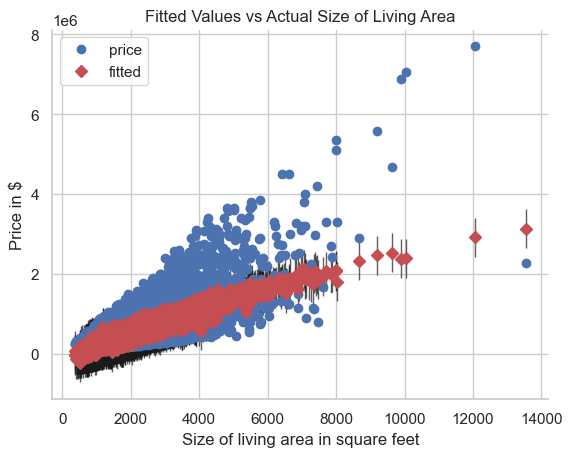

In [59]:
# Visualize the actual vs. predicted values of living area size 
# using the best-fitting model
sm.graphics.plot_fit(fourth_results, 'sqft_living') 
plt.title('Fitted Values vs Actual Size of Living Area')
plt.xlabel('Size of living area in square feet')
plt.ylabel('Price in $')
plt.show()

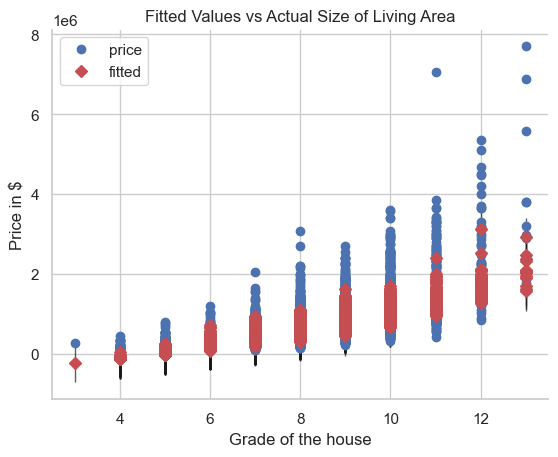

In [60]:
# Visualize the actual vs. predicted values of grade using the best-fitting model
sm.graphics.plot_fit(fourth_results, 'grade') 
plt.title('Fitted Values vs Actual Size of Living Area')
plt.xlabel('Grade of the house')
plt.ylabel('Price in $')
plt.show()

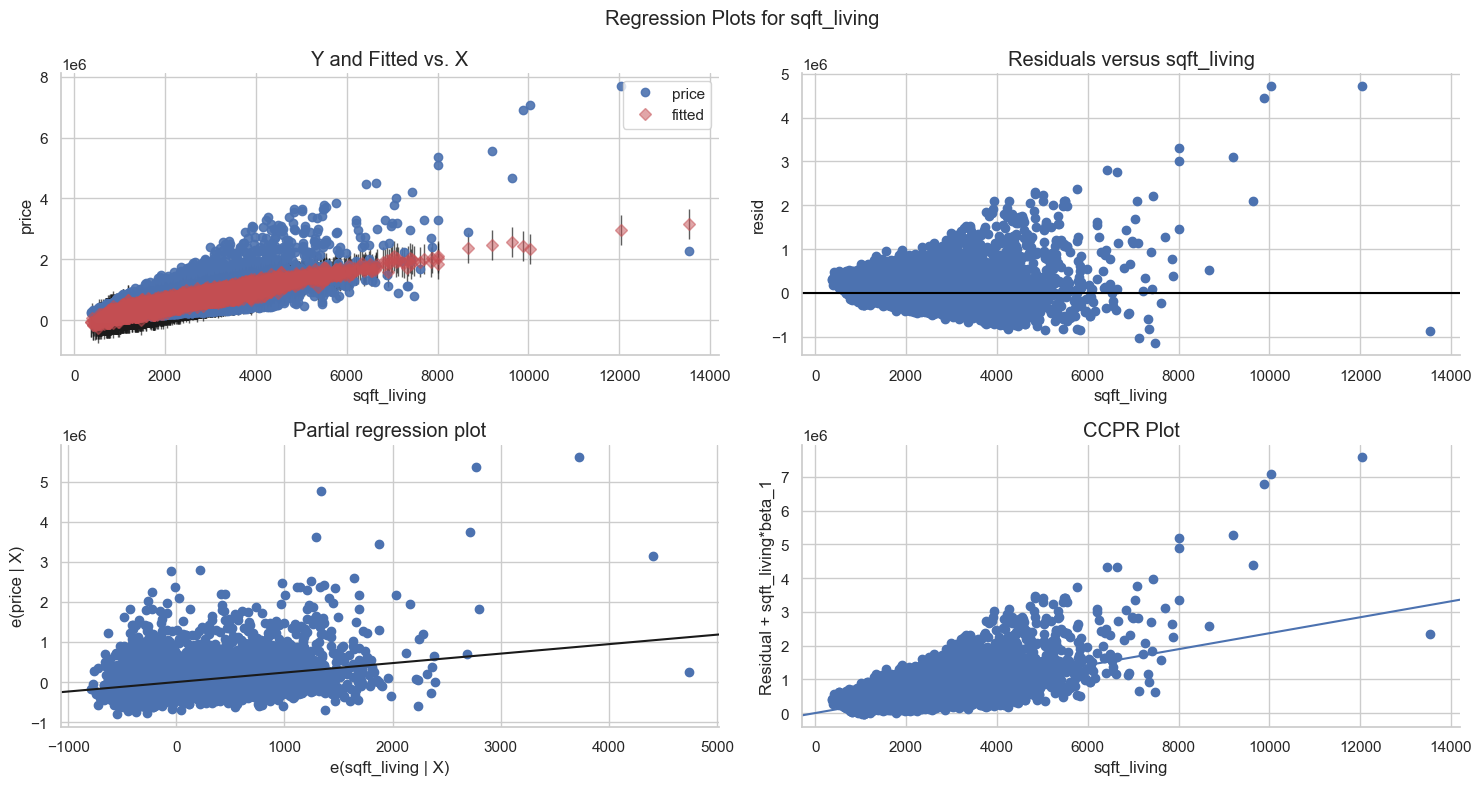

In [61]:
# Regression Plots for Size of Living Area
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results, "sqft_living", fig=fig)
plt.show()